## Importing Required Libraries

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

## Reading the dataset using pandas

In [192]:
data = pd.read_csv(r'./Asteroid_Updated.csv', low_memory=False)
data

,name,a,e,i,om,w,q,ad,per_y,data_arc,...,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
0,Ceres,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,...,0.426,NaN,C,G,0.12,1.594780,MBA,0.213885,1683.145708,77.372096
1,Pallas,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,...,0.284,NaN,B,B,0.11,1.233240,MBA,0.213503,1686.155999,59.699133
2,Juno,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,...,0.433,NaN,Sk,S,0.32,1.034540,MBA,0.226019,1592.787285,34.925016
3,Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,...,0.492,NaN,V,V,0.32,1.139480,MBA,0.271609,1325.432765,95.861936
4,Astraea,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,...,0.411,NaN,S,S,NaN,1.095890,MBA,0.238632,1508.600458,282.366289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839709,NaN,2.812945,0.664688,4.695700,183.310012,234.618352,0.943214,4.682676,4.717914,17298.0,...,NaN,NaN,NaN,NaN,NaN,0.032397,APO,0.208911,1723.217927,156.905910
839710,NaN,2.645238,0.259376,12.574937,1.620020,339.568072,1.959126,3.331350,4.302346,16.0,...,NaN,NaN,NaN,NaN,NaN,0.956145,MBA,0.229090,1571.431965,13.366251
839711,NaN,2.373137,0.202053,0.732484,176.499082,198.026527,1.893638,2.852636,3.655884,5.0,...,NaN,NaN,NaN,NaN,NaN,0.893896,MBA,0.269600,1335.311579,355.351127
839712,NaN,2.260404,0.258348,9.661947,204.512448,148.496988,1.676433,2.844376,3.398501,10.0,...,NaN,NaN,NaN,NaN,NaN,0.680220,MBA,0.290018,1241.302609,15.320134


## Finding Null Values

In [193]:
data.isnull().mean()

name              0.973840
a                 0.000002
e                 0.000000
i                 0.000000
om                0.000000
w                 0.000000
q                 0.000000
ad                0.000007
per_y             0.000001
data_arc          0.018428
condition_code    0.001032
n_obs_used        0.000000
H                 0.003202
neo               0.000007
pha               0.019580
diameter          0.836092
extent            0.999979
albedo            0.837553
rot_per           0.977616
GM                0.999983
BV                0.998784
UB                0.998834
IR                0.999999
spec_B            0.998016
spec_T            0.998833
G                 0.999858
moid              0.019580
class             0.000000
n                 0.000002
per               0.000007
ma                0.000010
dtype: float64

## Removing Rows with null target values(Diameter) *As suggested in the research paper*

In [194]:
train_data = data[data['diameter'].notna()]

In [195]:
train_data.isnull().mean()

name              0.890116
a                 0.000000
e                 0.000000
i                 0.000000
om                0.000000
w                 0.000000
q                 0.000000
ad                0.000000
per_y             0.000000
data_arc          0.001003
condition_code    0.000000
n_obs_used        0.000000
H                 0.005427
neo               0.000000
pha               0.000000
diameter          0.000000
extent            0.999884
albedo            0.008937
rot_per           0.918713
GM                0.999898
BV                0.992698
UB                0.992989
IR                0.999993
spec_B            0.990046
spec_T            0.992989
G                 0.999135
moid              0.000000
class             0.000000
n                 0.000000
per               0.000000
ma                0.000000
dtype: float64

### extent, name, rot_per, GM, BV, UB, IR, spec_B, spec_T, G have a significant amount of null values make them unnecessary so we will drop them

In [196]:
useless = ['extent', 'name', 'rot_per', 'GM', 'BV', 'UB', 'IR', 'spec_B', 'spec_T', 'G']
train_data = train_data.drop(columns = useless)

## Filling NA values of data_arc, albedo, H with mean

In [197]:
train_data['H'] = train_data['H'].fillna(train_data['H'].mean())
train_data['data_arc'] = train_data['data_arc'].fillna(train_data['data_arc'].mean())
train_data['albedo'] = train_data['albedo'].fillna(train_data['albedo'].mean())

## inspecting the data types of columns

In [198]:
train_data.dtypes

a                 float64
e                 float64
i                 float64
om                float64
w                 float64
q                 float64
ad                float64
per_y             float64
data_arc          float64
condition_code     object
n_obs_used          int64
H                 float64
neo                object
pha                object
diameter           object
albedo            float64
moid              float64
class              object
n                 float64
per               float64
ma                float64
dtype: object

## Target variable data type is object so we have to change it to float

In [199]:
train_data['diameter'] = train_data['diameter'].astype(float)

## Statistical Description of the data

In [200]:
train_data.describe()

,a,e,i,om,w,q,ad,per_y,data_arc,n_obs_used,H,diameter,albedo,moid,n,per,ma
count,137636.000000,137636.000000,137636.000000,137636.000000,137636.000000,137636.000000,137636.000000,137636.000000,137636.000000,137636.000000,137636.000000,137636.000000,137636.000000,137636.000000,137636.000000,1.376360e+05,137636.000000
mean,2.814613,0.145485,10.349182,169.827629,181.904551,2.402609,3.226618,4.884248,8969.818601,675.027740,15.177041,5.483228,0.130066,1.420145,0.219640,1.783972e+03,183.116785
std,1.522740,0.077573,6.835111,102.713052,103.556464,0.516169,2.896374,25.532565,6162.084652,595.935104,1.403829,9.385735,0.109501,0.512241,0.056980,9.325769e+03,103.411497
min,0.626226,0.000489,0.021855,0.000738,0.004466,0.081882,0.999956,0.495569,1.000000,5.000000,3.200000,0.002500,0.001000,0.000166,0.000128,1.810067e+02,0.000517
25%,2.536714,0.089623,5.120506,82.334880,91.947943,2.068948,2.864438,4.040317,6292.000000,215.000000,14.400000,2.770000,0.053000,1.082523,0.181231,1.475726e+03,94.301261
50%,2.750859,0.138543,9.389963,160.438430,183.669900,2.363897,3.167516,4.562581,7577.000000,496.000000,15.300000,3.956000,0.079000,1.384935,0.216024,1.666483e+03,186.826667
75%,3.092537,0.191141,13.738588,256.268387,271.762261,2.685811,3.468608,5.438518,9726.000000,984.000000,16.100000,5.742000,0.187000,1.699385,0.243948,1.986419e+03,271.468299
max,389.145964,0.984348,170.323647,359.990858,359.995174,40.465671,772.201080,7676.742943,72684.000000,9325.000000,29.900000,939.400000,1.000000,39.507000,1.988877,2.803930e+06,359.999979


## Correlation between numeric data and diameter

In [201]:
corr = train_data.corr()
corr['diameter']

a             0.144736
e            -0.049133
i             0.052609
om            0.001164
w             0.002966
q             0.329703
ad            0.093430
per_y         0.048953
data_arc      0.491580
n_obs_used    0.385747
H            -0.568493
diameter      1.000000
albedo       -0.107334
moid          0.332423
n            -0.201023
per           0.048953
ma            0.009659
Name: diameter, dtype: float64

## plotting numerical data vs diameter

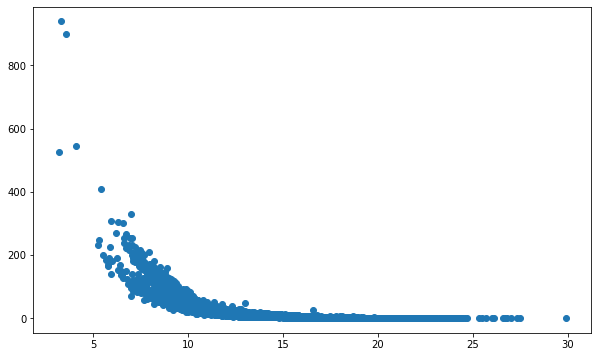

In [18]:
plt.figure(figsize=(10,6))
plt.scatter(train_data['H'],train_data['diameter'])

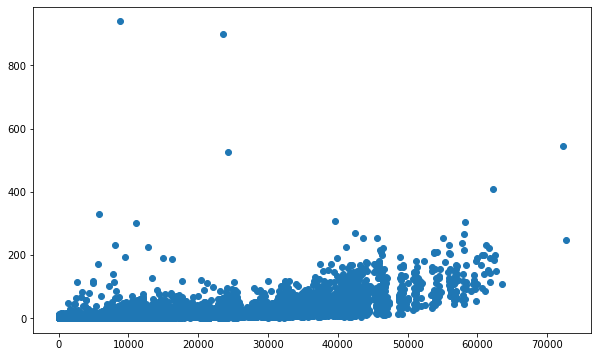

In [19]:
plt.figure(figsize=(10,6))
plt.scatter(train_data['data_arc'],train_data['diameter'])

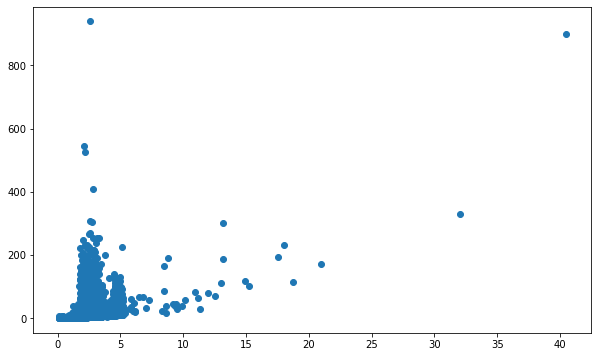

In [20]:
plt.figure(figsize=(10,6))
plt.scatter(train_data['q'],train_data['diameter'])

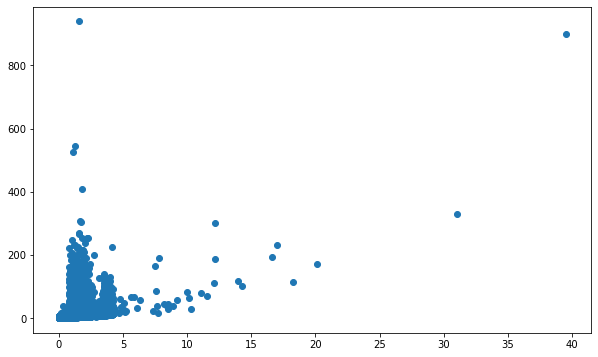

In [21]:
plt.figure(figsize=(10,6))
plt.scatter(train_data['moid'],train_data['diameter'])

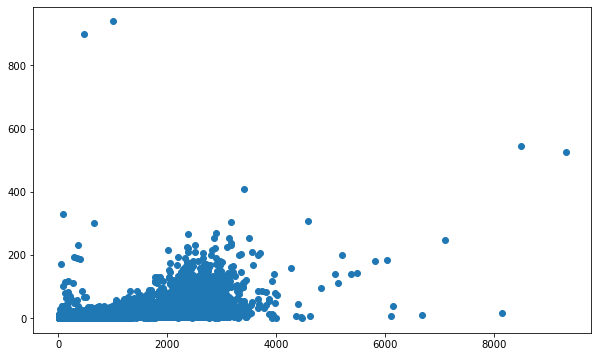

In [22]:
plt.figure(figsize=(10,6))
plt.scatter(train_data['n_obs_used'],train_data['diameter'])

## moid and q are almost the same so we can drop one of them

## Plotting Categorical Data

<AxesSubplot:xlabel='class', ylabel='diameter'>

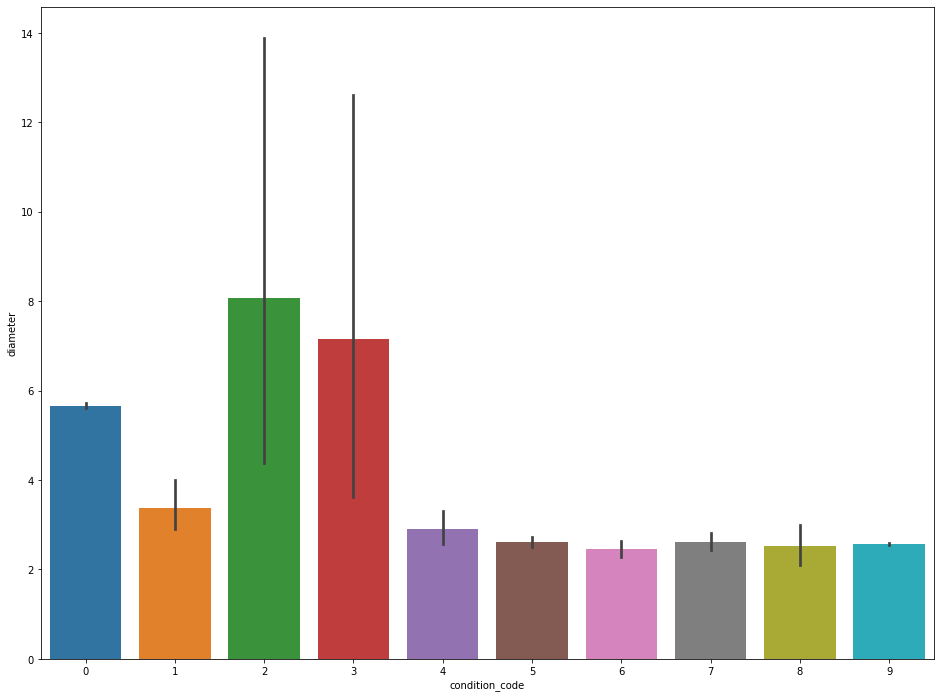

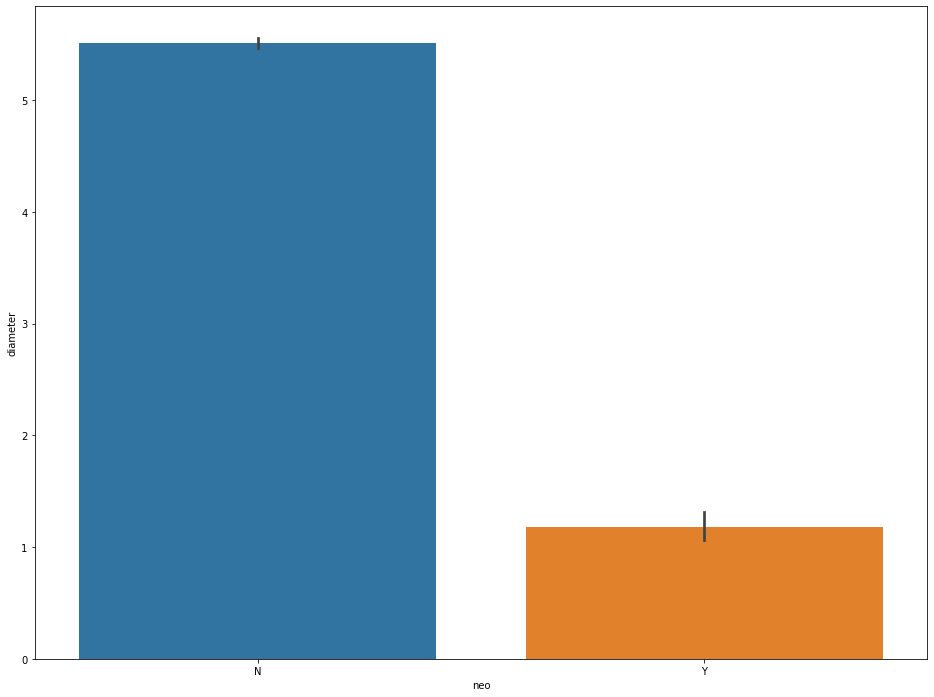

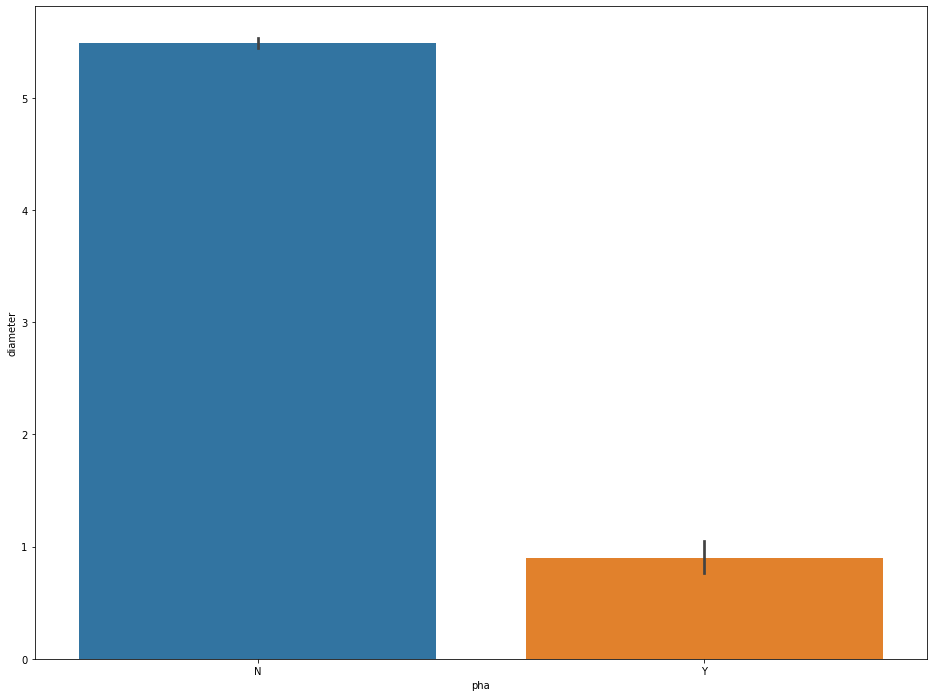

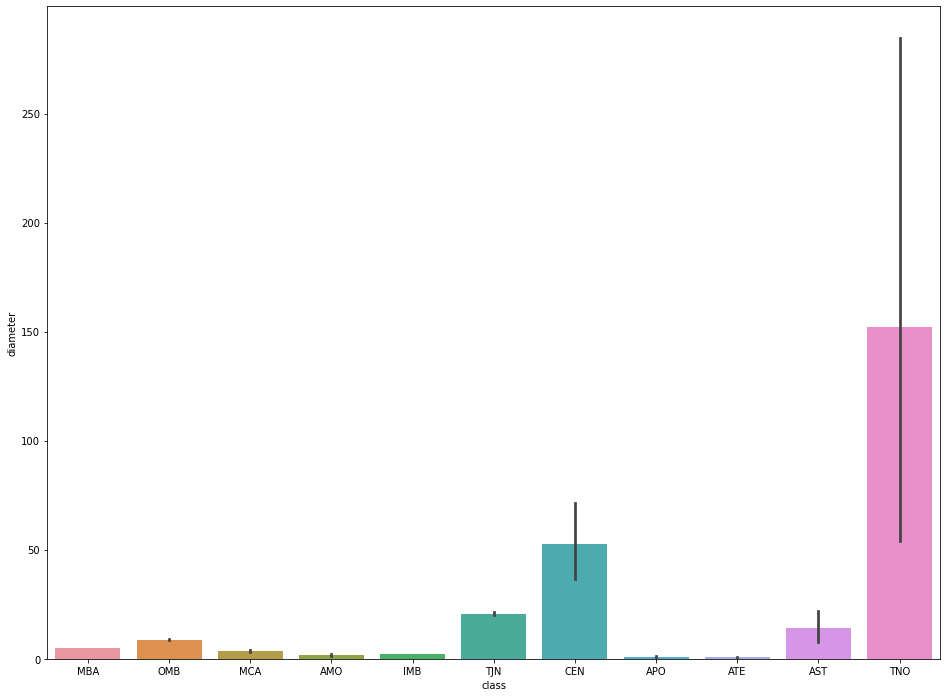

In [100]:
plt.figure(figsize=(16,12))
sns.barplot(x = 'condition_code', y = 'diameter', data=train_data)
plt.figure(figsize=(16,12))
sns.barplot(x = 'neo', y = 'diameter', data=train_data)
plt.figure(figsize=(16,12))
sns.barplot(x = 'pha', y = 'diameter', data=train_data)
plt.figure(figsize=(16,12))
sns.barplot(x = 'class', y = 'diameter', data=train_data)

## Label Encoding for the categorical data

In [206]:
encode = LabelEncoder()
train_data['condition_code'] = encode.fit(train_data['condition_code']).transform(train_data['condition_code'])
train_data['neo'] = encode.fit(train_data['neo']).transform(train_data['neo'])
train_data['pha'] = encode.fit(train_data['pha']).transform(train_data['pha'])
train_data['class'] = encode.fit(train_data['class']).transform(train_data['class'])

## Splliting data into feature vector and labels

In [225]:
x = train_data.drop(columns=['diameter','q'])
y = train_data['diameter']

## Creating validation set

In [226]:
x_train, x_dev, y_train, y_dev = train_test_split(x, y, test_size = 0.25)

## Applying GridSearch for better hyperparameter selection

In [227]:
regressor = xgb.XGBRegressor()

In [229]:
parameters = {
              'learning_rate': [0.05, 0.1],
              'max_depth': [5, 6, 7],
              'subsample': [0.7, 1],
              'colsample_bytree': [0.7, 1],
              'n_estimators': [100,500]
                    }

In [230]:
xgb_grid = GridSearchCV(regressor,
                        parameters,
                        cv = 3,
                        n_jobs = 5,
                        verbose=True)

In [231]:
xgb_grid.fit(x_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:  7.0min
[Parallel(n_jobs=5)]: Done 144 out of 144 | elapsed: 33.6min finished


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_para

In [232]:
print("Best Score:", xgb_grid.best_score_)
print("Best Parameters:", xgb_grid.best_params_)

0.9769715458190643
{'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 500, 'subsample': 1}


## Applying the best parameters for regression

In [245]:
regressor = xgb.XGBRegressor(learning_rate=0.1, n_estimators= 500, max_depth = 5, subsample =1 )

## Creating our XGboost Regression Model

In [246]:
regressor.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

## Evaluating Train Error and R2Score of our model

In [247]:
y_train_pred = regressor.predict(x_train)

In [248]:
train_mse = mean_squared_error(y_train_pred, y_train)
train_r2=r2_score(y_train_pred, y_train)
print('Train Mean Squared Error:', train_mse)
print('Train R2-Score:', train_r2)

Train Mean Squared Error: 0.2716085504671774
Train R2-Score: 0.9971199448892674


## Evaluating Validation Error and R2Score

In [249]:
y_pred = regressor.predict(x_dev)

In [250]:
val_mse = mean_squared_error(y_pred, y_dev)
val_r2=r2_score(y_pred, y_dev)
print('Validation Mean Squared Error:', val_mse)
print('Validation R2-Score:', val_r2)

Validation Mean Squared Error: 1.668358259433111
Validation R2-Score: 0.9742843963911726


## Plotting results (y_pred vs y_dev)

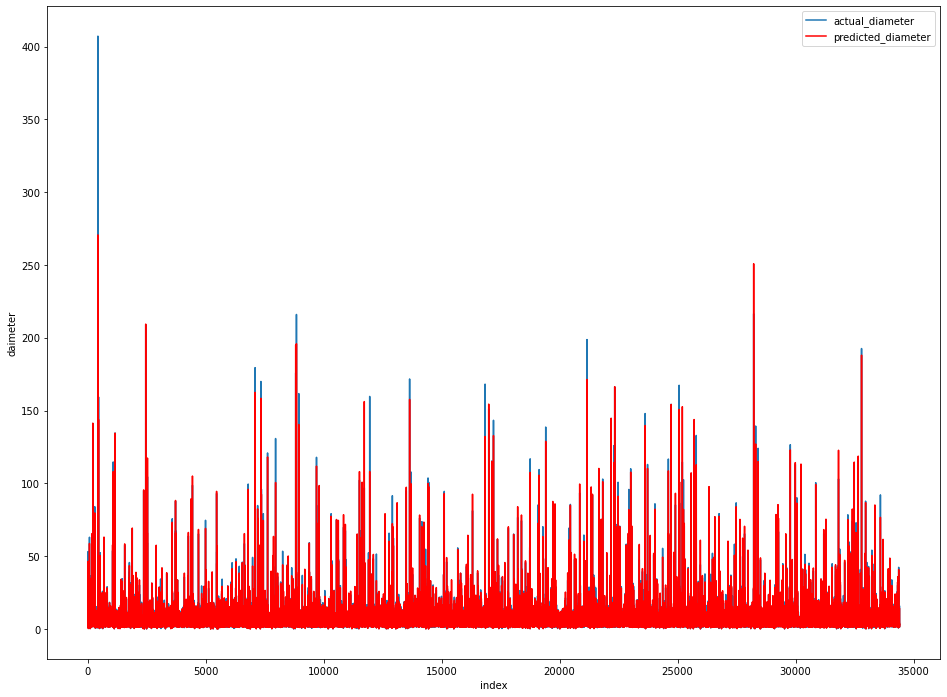

In [254]:
x = list(range(len(y_pred)))
plt.figure(figsize=(16,12))
plt.xlabel('index')
plt.ylabel('daimeter')
plt.plot(x,y_dev,label='actual_diameter')
plt.plot(x,y_pred,'r',label='predicted_diameter')
plt.legend()

## Zooming in Between

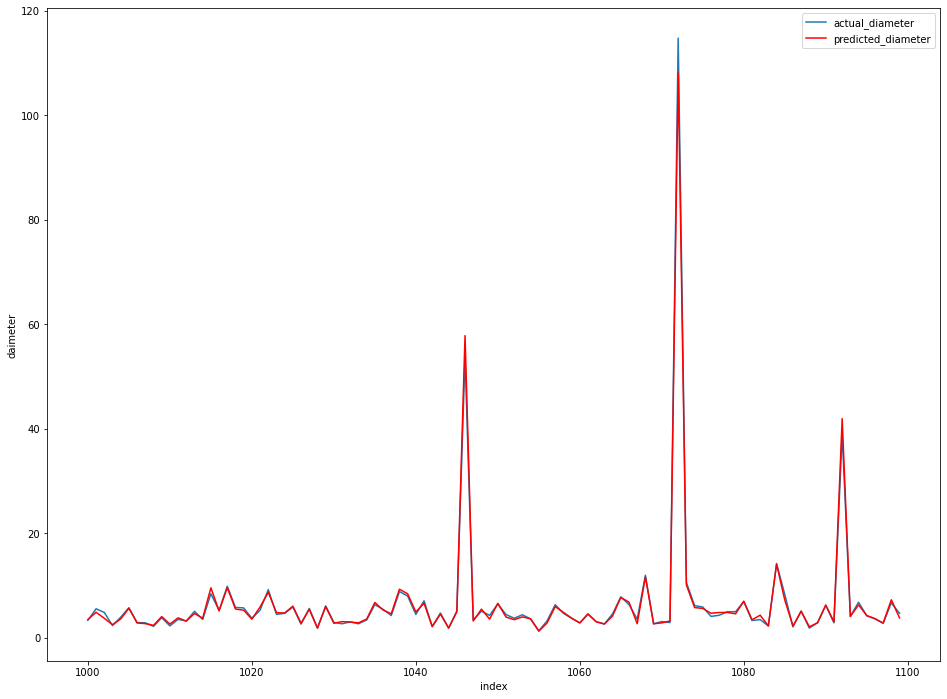

In [259]:
x = list(range(len(y_pred)))[1000:1100]
plt.figure(figsize=(16,12))
plt.xlabel('index')
plt.ylabel('daimeter')
plt.plot(x,y_dev[1000:1100],label='actual_diameter')
plt.plot(x,y_pred[1000:1100],'r',label='predicted_diameter')
plt.legend()

## --The End--